# San Francisco building permit

This project is based on https://www.kaggle.com/aparnashastry/building-permit-applications-data.

I started it as part of Udacity Bertelsmann Scholarship phase 1 data challenge with the SF Bay Area study group (initial_analysis.ipynb). 



Some interesting questions:
- How long does it take to get permit?
- When is the best time to file?
- How should they allocate personnel?

## A. Data Exloration

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
raw_data = pd.read_csv('./kaggle_original_data/Building_Permits.csv')
display(raw_data.head())

/Users/rosaria/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
Permit Number                             198900 non-null object
Permit Type                               198900 non-null int64
Permit Type Definition                    198900 non-null object
Permit Creation Date                      198900 non-null object
Block                                     198900 non-null object
Lot                                       198900 non-null object
Street Number                             198900 non-null int64
Street Number Suffix                      2216 non-null object
Street Name                               198900 non-null object
Street Suffix                             196132 non-null object
Unit                                      29479 non-null float64
Unit Suffix                               1961 non-null object
Description                               198610 non-null object
Current Status                            198900 n

In [4]:
# keep certain features
keep = 'Permit Number,Permit Type Definition,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Estimated Cost,Revised Cost,TIDF Compliance,Site Permit,Supervisor District,Zipcode'.split(',')
df = raw_data[keep]

In [5]:
features = list(df)
for feature in features[1:]:
    print(feature)
    print(df[feature].unique())

Permit Type Definition
['sign - erect' 'additions alterations or repairs'
 'otc alterations permit' 'demolitions' 'wall or painted sign'
 'new construction' 'grade or quarry or fill or excavate'
 'new construction wood frame']
Description
['ground fl facade: to erect illuminated, electric, wall, single faced sign. n/a for maher ordinance 155-13.'
 'remove (e) awning and associated signs.'
 'installation of separating wall' ...
 'apt m2ph-1e: remove & replace kitchen adn bathroom counters tops, sinks, p-traps to be replaced, exh fan at same location. light shall be h.e. remove and replace (e) switches and outlets. no change on walls or layout.'
 'bathtub & shower tile replacement.'
 'fire alarm upgrade ref 201704123852']
Current Status
['expired' 'issued' 'withdrawn' 'complete' 'filed' 'approved' 'reinstated'
 'cancelled' 'appeal' 'suspend' 'revoked' 'plancheck' 'disapproved'
 'incomplete']
Current Status Date
['12/21/2017' '08/03/2017' '09/26/2017' ... '01/02/2018' '07/15/2017'
 '07/29

## B. Data Wrangling

### 1. Change data types

In [6]:
# change data types
# datetime
pd.set_option('mode.chained_assignment', None)
datetime_cols = ['Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='ignore')

In [7]:
def change_to_binary(entry):
    '''
    input: df, colname
    output: df w/ column transformed to 0/1
    '''
    # if there is no entry, set to 0
    if pd.isna(entry):
        return 0
    else: return 1

binary_cols = ['Structural Notification', 'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'TIDF Compliance', 'Site Permit']
df[binary_cols] = df[binary_cols].applymap(change_to_binary)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 19 columns):
Permit Number                       198900 non-null object
Permit Type Definition              198900 non-null object
Description                         198610 non-null object
Current Status                      198900 non-null object
Current Status Date                 198900 non-null datetime64[ns]
Filed Date                          198900 non-null datetime64[ns]
Issued Date                         183960 non-null datetime64[ns]
First Construction Document Date    183954 non-null datetime64[ns]
Structural Notification             198900 non-null int64
Number of Existing Stories          156116 non-null float64
Number of Proposed Stories          156032 non-null float64
Voluntary Soft-Story Retrofit       198900 non-null int64
Fire Only Permit                    198900 non-null int64
Estimated Cost                      160834 non-null float64
Revised Cost                   

### 3. Null entries
**a. Description** <br>
Will eventually drop

**b. Issued Date** <br>
Some permits were never issued => take out null rows when looking at how long it takes to get permit
<br>

**c. First Construction Document Date**

In [9]:
def explore_data(df, feature, columns=['Permit Type Definition', 'Description'], head = True):
    '''
    displays a clip of df where the feature is nan
    '''
    t = df[df[feature].isna()][columns]
    print('Number of nulls: '+str(len(t)))
    if head:
        display(t.head())
    else:
        display(t)

In [10]:
explore_data(df, 'First Construction Document Date')

Number of nulls: 14946


,Permit Type Definition,Description
2,additions alterations or repairs,installation of separating wall
13,otc alterations permit,remove and replace landscape wall
18,otc alterations permit,soft story ordinance sf building code chptr 34...
21,otc alterations permit,repair fire damage to comply with nov #201551241.
22,additions alterations or repairs,"soft story retrofit per sfebc chapter 4d, asce..."


Most NaN in First Construction Document Date appears to be those that do not need a construction document (there are some exceptions, but these may be able to be caught by other parameters, such as Permit Type Definition). So convert this column to 0/1 whether there is a document.

In [11]:
df['First Construction Document Date'] = df['First Construction Document Date'].apply(change_to_binary)
df = df.rename(columns = {'First Construction Document Date':'Construction Document'})

**d. Number of Existing Stories**<br>
For the number of existing stories, what kind of permits are missing values?

In [12]:
explore_data(df, 'Number of Existing Stories')

Number of nulls: 42784


,Permit Type Definition,Description
7,otc alterations permit,streetspace
8,otc alterations permit,street space permit
9,otc alterations permit,street space
10,otc alterations permit,street space
11,otc alterations permit,street space


There are many street space description. See how many are street space description.

In [13]:
def get_null_street(df, feature, columns=['Permit Type Definition', 'Description'], head = True):
    '''
    returns df where the feature is nan and does not have street space in description
    '''
    t = df[df[feature].isna()][columns]
    print('Number of permits with null value:'+str(len(t)))
    t = t[~(t['Description'].str.contains('street space', na=False) | t['Description'].str.contains('streetspace', na=False))]
    print('Number of non-street space permits: '+str(len(t)))
    if head:
        display(t.head())
    else:
        display(t)

In [14]:
get_null_street(df, 'Number of Existing Stories')

Number of permits with null value:42784
Number of non-street space permits: 7533


,Permit Type Definition,Description
55,wall or painted sign,re-face (1) existing projecting sign. maher na
64,additions alterations or repairs,fire alarm system for appln #201006104250
80,otc alterations permit,strwet space permit
83,new construction,bldg 7. erect a type i&iii (5) story (3) basem...
90,wall or painted sign,"to erect electric, projecting, double faced si..."


Most of the null entries are for street space permits. And for many others, 0 makes sense. For nulls, change to 0.

In [15]:
df['Number of Existing Stories'] = df['Number of Existing Stories'].fillna(0)

**e. Number of Proposed Stories**

In [16]:
explore_data(df, 'Number of Proposed Stories')

Number of nulls: 42868


,Permit Type Definition,Description
0,sign - erect,"ground fl facade: to erect illuminated, electr..."
1,sign - erect,remove (e) awning and associated signs.
4,demolitions,demolish retail/office/commercial 3-story buil...
7,otc alterations permit,streetspace
8,otc alterations permit,street space permit


See if the same applies as number of existing stories regarding street space.

In [17]:
get_null_street(df, 'Number of Proposed Stories')

Number of permits with null value:42868
Number of non-street space permits: 7617


,Permit Type Definition,Description
0,sign - erect,"ground fl facade: to erect illuminated, electr..."
1,sign - erect,remove (e) awning and associated signs.
4,demolitions,demolish retail/office/commercial 3-story buil...
55,wall or painted sign,re-face (1) existing projecting sign. maher na
64,additions alterations or repairs,fire alarm system for appln #201006104250


Most of the null entries are for street space permits. And for many others, 0 makes sense. For nulls, change to 0.

In [18]:
df['Number of Proposed Stories'] = df['Number of Proposed Stories'].fillna(0)

**f. Estimated Cost & Revised Cost**

Combine the two to make a new column "Cost". If there is a revised cost, use that value; if there is only estimated cost, use that value.

In [19]:
df['Cost'] = df['Revised Cost']
df['Cost'] = df['Cost'].fillna(df['Estimated Cost'])

In [20]:
explore_data(df, 'Cost')

Number of nulls: 605


,Permit Type Definition,Description
64,additions alterations or repairs,fire alarm system for appln #201006104250
236,otc alterations permit,replace broken windows and put in new security...
308,otc alterations permit,street space
331,otc alterations permit,revision to 201703101218 change floor plan lay...
340,otc alterations permit,remove all layers of existing roof. install ne...


In [21]:
605/df.shape[0]

0.0030417295123177476

In [22]:
get_null_street(df, 'Cost')

Number of permits with null value:605
Number of non-street space permits: 543


,Permit Type Definition,Description
64,additions alterations or repairs,fire alarm system for appln #201006104250
236,otc alterations permit,replace broken windows and put in new security...
331,otc alterations permit,revision to 201703101218 change floor plan lay...
340,otc alterations permit,remove all layers of existing roof. install ne...
379,otc alterations permit,repair stairs at front entry less than 50% rep...


What about columns that has no revised cost or estimated cost? It is only 0.3% of the data, so just drop.

In [23]:
df = df.dropna(subset=['Cost'])
df = df.drop(['Estimated Cost', 'Revised Cost'], axis = 1)

**f. Supervisor District**

In [24]:
explore_data(df, 'Supervisor District')

Number of nulls: 1710


,Permit Type Definition,Description
452,otc alterations permit,street space
464,otc alterations permit,"per fire department request, at block 5286a, l..."
577,otc alterations permit,street space
731,otc alterations permit,tear off 1.5 poly 150 nail base insulation.
864,otc alterations permit,relocate 2 pendents & 1 sidewall in room 2848t...


In [25]:
1710/df.shape[0]

0.008623515469376434

0.8% of the data have null for supervisor district. Drop the nulls.

In [26]:
df = df.dropna(subset=['Supervisor District'])
# change datatype to int
df['Supervisor District'] = df['Supervisor District'].astype(int)

**g. Zipcode**

In [27]:
explore_data(df, 'Zipcode')

Number of nulls: 2


,Permit Type Definition,Description
18532,otc alterations permit,(rear) repair railings and ballusters guard ra...
183375,otc alterations permit,install vinyl siding to back of house. not vis...


Only 2 additional data point is null for zipcode. Drop them.

In [28]:
df = df.dropna(subset=['Zipcode'])
df['Zipcode'] = df['Zipcode'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196583 entries, 0 to 198885
Data columns (total 18 columns):
Permit Number                    196583 non-null object
Permit Type Definition           196583 non-null object
Description                      196395 non-null object
Current Status                   196583 non-null object
Current Status Date              196583 non-null datetime64[ns]
Filed Date                       196583 non-null datetime64[ns]
Issued Date                      182294 non-null datetime64[ns]
Construction Document            196583 non-null int64
Structural Notification          196583 non-null int64
Number of Existing Stories       196583 non-null float64
Number of Proposed Stories       196583 non-null float64
Voluntary Soft-Story Retrofit    196583 non-null int64
Fire Only Permit                 196583 non-null int64
TIDF Compliance                  196583 non-null int64
Site Permit                      196583 non-null int64
Supervisor District          

### 4. Drop description
Now that I have sorted out all the null values except for issued date, drop description.

In [30]:
df = df.drop('Description', axis=1)
df.shape

(196583, 17)

### 5. Data information

In [31]:
df.describe()

,Construction Document,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,TIDF Compliance,Site Permit,Supervisor District,Zipcode,Cost
count,196583.000000,196583.000000,196583.000000,196583.000000,196583.000000,196583.000000,196583.00000,196583.000000,196583.000000,196583.000000,1.965830e+05
mean,0.927283,0.035207,4.495930,4.526075,0.000178,0.094698,0.00001,0.027251,5.538159,94115.496457,1.535541e+05
std,0.259673,0.184302,8.001282,8.005161,0.013342,0.292798,0.00319,0.162813,2.886822,9.271925,3.673882e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,94102.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,3.000000,94109.000000,1.000000e+00
50%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.00000,0.000000,6.000000,94114.000000,7.500000e+03
75%,1.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.00000,0.000000,8.000000,94122.000000,3.000000e+04
max,1.000000,1.000000,63.000000,63.000000,1.000000,1.000000,1.00000,1.000000,11.000000,94158.000000,7.805000e+08


In [32]:
do_not_include = ['Permit Number', 'Current Status Date', 'Filed Date', 'Issued Date']
features = [x for x in df.columns if x not in do_not_include]
for feature in features:
    print(feature)
    print(df[feature].value_counts())
    print('=====')

Permit Type Definition
otc alterations permit                 176649
additions alterations or repairs        14609
sign - erect                             2840
new construction wood frame               949
demolitions                               595
wall or painted sign                      505
new construction                          345
grade or quarry or fill or excavate        91
Name: Permit Type Definition, dtype: int64
=====
Current Status
complete       96329
issued         82659
filed          11413
withdrawn       1737
cancelled       1528
expired         1364
approved         731
reinstated       559
suspend          193
revoked           49
plancheck         15
appeal             2
disapproved        2
incomplete         2
Name: Current Status, dtype: int64
=====
Construction Document
1    182288
0     14295
Name: Construction Document, dtype: int64
=====
Structural Notification
0    189662
1      6921
Name: Structural Notification, dtype: int64
=====
Number of Existing

## C. Predict how many permits will be filed
### 1. Response
Number of permits filed per month needs to be normalized because same months in different years may have different number of working days.

In [33]:
# calculate number of working days per month
from pandas.tseries import holiday
import calendar 
import datetime as dt

cal = holiday.USFederalHolidayCalendar()
holidays = cal.holidays(start='2013-01-01', end='2019-01-01').to_pydatetime()

def is_workday(year, month, day):
    ''' 
    returns True if workday (not federal holiday or a weekend)
    input: year, month, day
    output: boolean, T if workday
    '''
    if dt.datetime(year, month, day) not in holidays and dt.date(year, month, day).weekday() < 5:
        return True

def find_maxDay(year, month):
    ''' 
    returns number of days in the year & month
    input: year, month
    output: number of days in month
    '''
    return calendar.monthrange(year, month)[1]
    
def find_work_days(year, month, maxDay):
    ''' 
    calculates number of work days from in a given year & month up to maxDay
    input: year, month, maxDay (esp. if not full month)
    output: number of working days
    '''
    days = 0
    for day in range(1, maxDay+1):
        if is_workday(year, month, day):
            days += 1
    return days

In [34]:
df['Filed Date'].min(), df['Filed Date'].max()

(Timestamp('2013-01-02 00:00:00'), Timestamp('2018-02-23 00:00:00'))

In [35]:
df['Year'] = df['Filed Date'].apply(lambda x: x.year)
df['Month'] = df['Filed Date'].apply(lambda x: x.month)

In [36]:
monthly = df.groupby(['Year', 'Month'])['Permit Number'].count().reset_index()
monthly = monthly.rename(columns = {'Permit Number':'Permits'})
monthly.head()

,Year,Month,Permits
0,2013,1,2696
1,2013,2,2462
2,2013,3,2706
3,2013,4,2874
4,2013,5,3126


In [37]:
# add workday
monthly['Workdays'] = monthly.apply(lambda x: find_work_days(x.Year, x.Month, find_maxDay(x.Year, x.Month)), axis = 1)

In [38]:
monthly.tail()

,Year,Month,Permits,Workdays
57,2017,10,3662,21
58,2017,11,3221,20
59,2017,12,3072,20
60,2018,1,3213,21
61,2018,2,2654,19


We need to adjust February 2018 workday numbers, because the last record in the data is 2/23/18.

In [39]:
find_work_days(2018, 2, 23)

16

In [40]:
monthly['Workdays'][61] = 16
monthly.tail()

,Year,Month,Permits,Workdays
57,2017,10,3662,21
58,2017,11,3221,20
59,2017,12,3072,20
60,2018,1,3213,21
61,2018,2,2654,16


In [41]:
# calculate permits/workday
monthly['NormPermits'] = monthly['Permits']/monthly['Workdays']
monthly.head()

,Year,Month,Permits,Workdays,NormPermits
0,2013,1,2696,21,128.380952
1,2013,2,2462,19,129.578947
2,2013,3,2706,21,128.857143
3,2013,4,2874,22,130.636364
4,2013,5,3126,22,142.090909


In [42]:
# set response variable
y = monthly['NormPermits']

**Explore what the trends look like for number of permits filed**

In [43]:
# set a date for plot
monthly['Date'] = pd.to_datetime(monthly['Year']*10000+monthly['Month']*100+1,format='%Y%m%d')

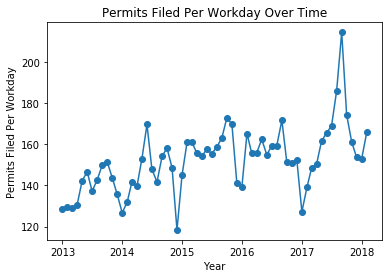

In [44]:
plt.plot('Date', 'NormPermits', data=monthly, linestyle='-', marker='o')
plt.title('Permits Filed Per Workday Over Time')
plt.xlabel('Year')
plt.ylabel('Permits Filed Per Workday');

Overall, the number of permits filed appear to increase over years with cyclical pattern, likely due to the fact that there is generally less construction in winter or people are less likely to start a project during holiday season.

Check if there really is increasing yearly trend.

In [45]:
def make_aggregate(df, group):
    '''
    returns df combining number of permits filed in a group and workdays
    '''
    temp = df.groupby(group)[['Permits', 'Workdays']].sum().reset_index()
    temp['NormPermits'] = temp['Permits']/temp['Workdays']
    return temp

In [46]:
yearly = make_aggregate(monthly, 'Year')
yearly.head()

,Year,Permits,Workdays,NormPermits
0,2013,34864,251,138.900398
1,2014,36210,251,144.262948
2,2015,39621,251,157.852590
3,2016,39323,251,156.665339
4,2017,40698,250,162.792000


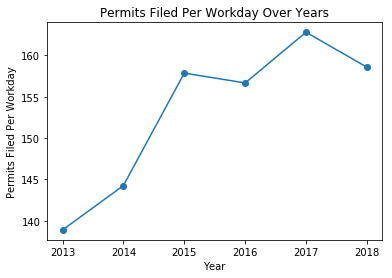

In [47]:
plt.plot('Year', 'NormPermits', data=yearly, linestyle='-', marker='o')
plt.title('Permits Filed Per Workday Over Years')
plt.xlabel('Year')
plt.ylabel('Permits Filed Per Workday');

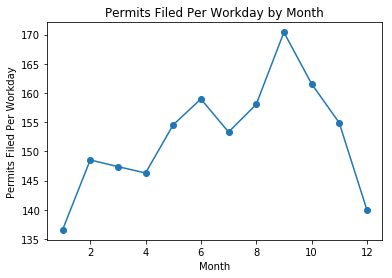

In [48]:
monthly2 = make_aggregate(monthly, 'Month')
plt.plot('Month', 'NormPermits', data=monthly2, linestyle='-', marker='o')
plt.title('Permits Filed Per Workday by Month')
plt.xlabel('Month')
plt.ylabel('Permits Filed Per Workday');

There really is a cyclical pattern with lower volume of permits filed in winter (December - April).

### 2. Features
- **weather** (seasonal): One hypothesis is that there is a seasonal component to the trend, which can be captured by weather data. Weather data from: National Weather Service Forecast Office, San Francisco Bay Area/Monterey; 7/17/18 accessed; https://w2.weather.gov/climate/xmacis.php?wfo=mtr 
- **stock prices** (economy, population growth): The overall growth over years may be due to economy/population growth which may also be reflected by stock prices. This data was downloaded from yahoo finance.

In [49]:
weather = pd.read_csv('sf_weather.csv')
weather.tail()

,Year,Month,Precipitation,Max_temp,Avg_temp
55,2017,8,0.01,86,62.2
56,2017,9,0.10,106,67.9
57,2017,10,0.31,89,63.5
58,2017,11,2.83,70,58.5
59,2017,12,0.15,67,54.4


In [50]:
# add 2018 Jan & Feb data that is not in the spreadsheet
weather_2018 = pd.DataFrame({'Year':[2018, 2018], 'Month':[1, 2], 'Precipitation': [5.21, 0.21], 'Max_temp': [67,77], 'Avg_temp':[54.4, 55.5]})
weather = weather.append(weather_2018, ignore_index=True)
weather.tail()

,Year,Month,Precipitation,Max_temp,Avg_temp
57,2017,10,0.31,89,63.5
58,2017,11,2.83,70,58.5
59,2017,12,0.15,67,54.4
60,2018,1,5.21,67,54.4
61,2018,2,0.21,77,55.5


Inflation data from https://www.bls.gov/data/inflation_calculator.htm

In [51]:
nasdaq = pd.read_csv('nasdaq.csv')
nasdaq.tail()

,Date,Adj Close,inflation
57,10/1/17,6727.669922,1.07
58,11/1/17,6873.970215,1.07
59,12/1/17,6903.390137,1.07
60,1/1/18,7411.479980,1.08
61,2/1/18,7273.009766,1.08


In [52]:
# merge permit info, weather, & nasdaq
monthly = monthly.merge(weather)
monthly = pd.concat([monthly, weather, nasdaq], axis=1)

In [53]:
# eliminate duplicated columns
monthly = monthly.loc[:,~monthly.columns.duplicated()]
monthly.head()

,Year,Month,Permits,Workdays,NormPermits,Date,Precipitation,Max_temp,Avg_temp,Adj Close,inflation
0,2013,1,2696,21,128.380952,2013-01-01,0.49,64,50.8,3142.129883,1.00
1,2013,2,2462,19,129.578947,2013-02-01,0.85,71,52.4,3160.189941,1.01
2,2013,3,2706,21,128.857143,2013-03-01,0.97,73,55.2,3267.520020,1.01
3,2013,4,2874,22,130.636364,2013-04-01,1.01,82,57.6,3328.790039,1.01
4,2013,5,3126,22,142.090909,2013-05-01,0.04,88,58.7,3455.909912,1.01


In [54]:
# calculate nasdaq adjusted for inflation
monthly['nasdaq'] = monthly['Adj Close']/monthly['inflation']
monthly.head()

,Year,Month,Permits,Workdays,NormPermits,Date,Precipitation,Max_temp,Avg_temp,Adj Close,inflation,nasdaq
0,2013,1,2696,21,128.380952,2013-01-01,0.49,64,50.8,3142.129883,1.00,3142.129883
1,2013,2,2462,19,129.578947,2013-02-01,0.85,71,52.4,3160.189941,1.01,3128.900932
2,2013,3,2706,21,128.857143,2013-03-01,0.97,73,55.2,3267.520020,1.01,3235.168337
3,2013,4,2874,22,130.636364,2013-04-01,1.01,82,57.6,3328.790039,1.01,3295.831722
4,2013,5,3126,22,142.090909,2013-05-01,0.04,88,58.7,3455.909912,1.01,3421.692982


**Make month into a dummy variable**

In [55]:
monthly['Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec'.split(',')] = pd.get_dummies(monthly['Month'])

In [57]:
X = monthly.drop(['Month', 'Permits', 'Workdays', 'Date', 'Adj Close', 'inflation', 'NormPermits', 'Jan'], axis=1)
X.head()

,Year,Precipitation,Max_temp,Avg_temp,nasdaq,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,0.49,64,50.8,3142.129883,0,0,0,0,0,0,0,0,0,0,0
1,2013,0.85,71,52.4,3128.900932,1,0,0,0,0,0,0,0,0,0,0
2,2013,0.97,73,55.2,3235.168337,0,1,0,0,0,0,0,0,0,0,0
3,2013,1.01,82,57.6,3295.831722,0,0,1,0,0,0,0,0,0,0,0
4,2013,0.04,88,58.7,3421.692982,0,0,0,1,0,0,0,0,0,0,0


**look at multicollinearity**

In [60]:
import patsy
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = '+'.join(X.columns)
y_vif, X_vif = patsy.dmatrices('NormPermits ~'+features, monthly, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['features'] = X_vif.columns
vif

,VIF,features
0,1.974551e+07,Intercept
1,1.082759e+01,Year
2,1.837834e+00,Precipitation
3,5.761923e+00,Max_temp
4,9.301256e+00,Avg_temp
5,1.095440e+01,nasdaq
6,1.949686e+00,Feb
7,2.089680e+00,Mar
8,2.481923e+00,Apr
9,2.496525e+00,May


Year has has VIF (10.8), as does nasdaq (10.95). Avg_temp (9.3) is also pretty high. Drop Year (as it can also be captured by nasdaq and nasdaq captures additional information such as economy) and Avg_temp (use Max_temp for temperature).

In [62]:
X = X.drop(['Year', 'Avg_temp'], axis=1)
X.head()

,Precipitation,Max_temp,nasdaq,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0.49,64,3142.129883,0,0,0,0,0,0,0,0,0,0,0
1,0.85,71,3128.900932,1,0,0,0,0,0,0,0,0,0,0
2,0.97,73,3235.168337,0,1,0,0,0,0,0,0,0,0,0
3,1.01,82,3295.831722,0,0,1,0,0,0,0,0,0,0,0
4,0.04,88,3421.692982,0,0,0,1,0,0,0,0,0,0,0


### 3. Model selection

In [63]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2)

### 4. Linear regression

In [72]:
import statsmodels.api as sm

X_train['intercept'] = 1
X_test['intercept'] = 1

lm = sm.OLS(y_train, X_train)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NormPermits   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     8.248
Date:                Sun, 07 Oct 2018   Prob (F-statistic):           2.77e-07
Time:                        22:21:18   Log-Likelihood:                -166.44
No. Observations:                  49   AIC:                             362.9
Df Residuals:                      34   BIC:                             391.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Precipitation    -1.8111      0.980     -1.848      0.073      -3.803       0.180
Max_temp          0.8217      0.279      2.950      0.006       0.256       1.388
nasdaq            0.0110      0.002      6.727      0.000       0.008       0.014
Feb              12.2457      6.566      1.865      0.071      -1.098      25.590
Mar              10.4555      6.980      1.498      0.143      -3.729      24.640
Apr               1.8960      8.127      0.233      0.817     -14.620      18.412
May               4.7991      7.815      0.614      0.543     -11.083      20.681
Jun              13.4093      6.898      1.944      0.060      -0.608      27.427
Jul               6.6942      7.093      0.944      0.352      -7.721      21.110
Aug              11.3125      6.764      1.672      0.104      -2.434      25.059
Sep              16.3806      8.411      1.948      0.060      -0.712      33.473
Oct               8.2510      8.071      1.022      0.314      -8.152      24.654
Nov              14.0092      6.368      2.200      0.035       1.067      26.952
Dec               6.1544     10.238      0.601      0.552     -14.652      26.961
intercept        29.7663     20.078      1.483      0.147     -11.038      70.571
==============================================================================
Omnibus:                        3.518   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                3.288
Skew:                           0.622   Prob(JB):                        0.193
Kurtosis:                       2.749   Cond. No.                     8.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
lm = sm.OLS(y_train, X_train[['Precipitation', 'Max_temp', 'nasdaq']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NormPermits   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4423.
Date:                Sun, 07 Oct 2018   Prob (F-statistic):           1.32e-56
Time:                        22:23:21   Log-Likelihood:                -177.75
No. Observations:                  49   AIC:                             361.5
Df Residuals:                      46   BIC:                             367.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Precipitation    -1.1318      0.786     -1.441      0.156      -2.713       0.449
Max_temp          1.1949      0.085     13.982      0.000       1.023       1.367
nasdaq            0.0128      0.001      8.538      0.000       0.010       0.016
==============================================================================
Omnibus:                        2.454   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.872
Skew:                           0.477   Prob(JB):                        0.392
Kurtosis:                       3.071   Cond. No.                     2.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
lm = sm.OLS(y_train, X_train[['Max_temp', 'nasdaq']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            NormPermits   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6486.
Date:                Sun, 07 Oct 2018   Prob (F-statistic):           4.00e-58
Time:                        22:24:05   Log-Likelihood:                -178.84
No. Observations:                  49   AIC:                             361.7
Df Residuals:                      47   BIC:                             365.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Max_temp       1.2324      0.082     14.971      0.000       1.067       1.398
nasdaq         0.0119      0.001      8.635      0.000       0.009       0.015
==============================================================================
Omnibus:                        2.368   Durbin-Watson:                   2.346
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                1.798
Skew:                           0.468   Prob(JB):                        0.407
Kurtosis:                       3.067   Cond. No.                         290.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looks like Max_temp and nasdaq are the only two indicators needed to accurately predict the number of permits filed. These two features can explain 99.6% of the variance of the response (number of permits filed per work day).

In [76]:
X_train = X_train[['Max_temp', 'nasdaq']]
X_test = X_test[['Max_temp', 'nasdaq']]

In [94]:
pred = lm.predict(results.params, X_test)
pred

array([132.15178069, 116.24513522, 141.24113246, 184.46516326,
       139.02746956, 140.54466122, 136.6950633 , 142.34778802,
       160.2864334 , 170.42831948, 124.71469549, 164.63446484,
       159.30524592])

In [98]:
# get original data and prediction for the test set so that I can get date info
predictions = monthly.loc[X_test.index]
predictions = predictions.assign(Prediction = pred)

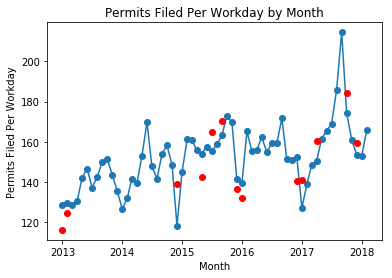

In [102]:
# plot true values and predictions
plt.plot('Date', 'NormPermits', data=monthly, linestyle='-', marker='o')
plt.plot('Date', 'Prediction', data=predictions, linestyle='none', marker = 'o', color = 'red')
plt.title('Permits Filed Per Workday by Month')
plt.xlabel('Month')
plt.ylabel('Permits Filed Per Workday');

In [78]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
pred

array([136.3335517 , 122.01554053, 144.63164304, 180.50940735,
       142.05649076, 143.8882154 , 140.42308594, 145.04520116,
       160.37666921, 167.1753686 , 128.8236234 , 163.00879157,
       160.42559226])

In [79]:
y_test

36    139.315789
0     128.380952
48    127.200000
57    174.380952
23    118.363636
47    152.571429
35    141.318182
28    154.050000
51    150.450000
32    163.142857
1     129.578947
30    155.363636
59    153.600000
Name: NormPermits, dtype: float64

## D. Predict how long it will take the permit to be issued